# WDUM Project - Credit card fraud detection

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


## Ładowanie danych z pliku

In [5]:
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

### Wyświetlamy kilka pierwszych wierszy

In [6]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Dzielimy dane na cechy (X) i etykiety(y) i na zbiory: treningowy (70%), walidacyjny (15%) i testowy (15%)

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

### Rozmiary zbiorów

In [8]:
print("Rozmiar zbioru treningowego:", len(X_train))
print("Rozmiar zbioru walidacyjnego:", len(X_val))
print("Rozmiar zbioru testowego:", len(X_test))

Rozmiar zbioru treningowego: 199364
Rozmiar zbioru walidacyjnego: 42721
Rozmiar zbioru testowego: 42722


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Rozkład klas

In [10]:
print('Brak oszustwa - ', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% zbioru')
print('Oszustwo -', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% zbioru')

Brak oszustwa -  99.83 % zbioru
Oszustwo - 0.17 % zbioru


Text(0.5, 1.0, 'Rozkład klasy \n (0: Brak oszustwa || 1: Oszustwo)')

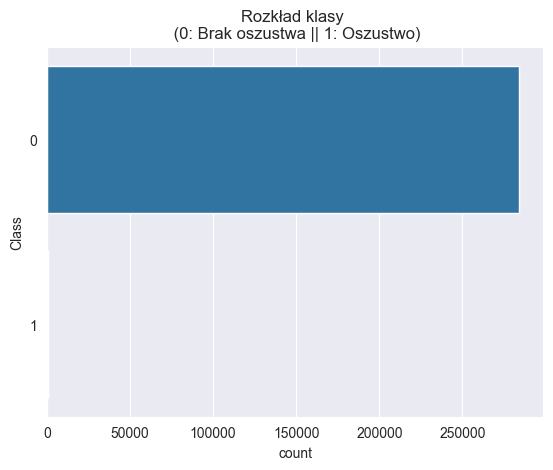

In [109]:
sns.countplot(data=df, y=y)
plt.title('Rozkład klasy \n (0: Brak oszustwa || 1: Oszustwo)')

## Rozkład kwoty i czasu

C:\Users\wogus\AppData\Local\Temp\ipykernel_2656\454091118.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')


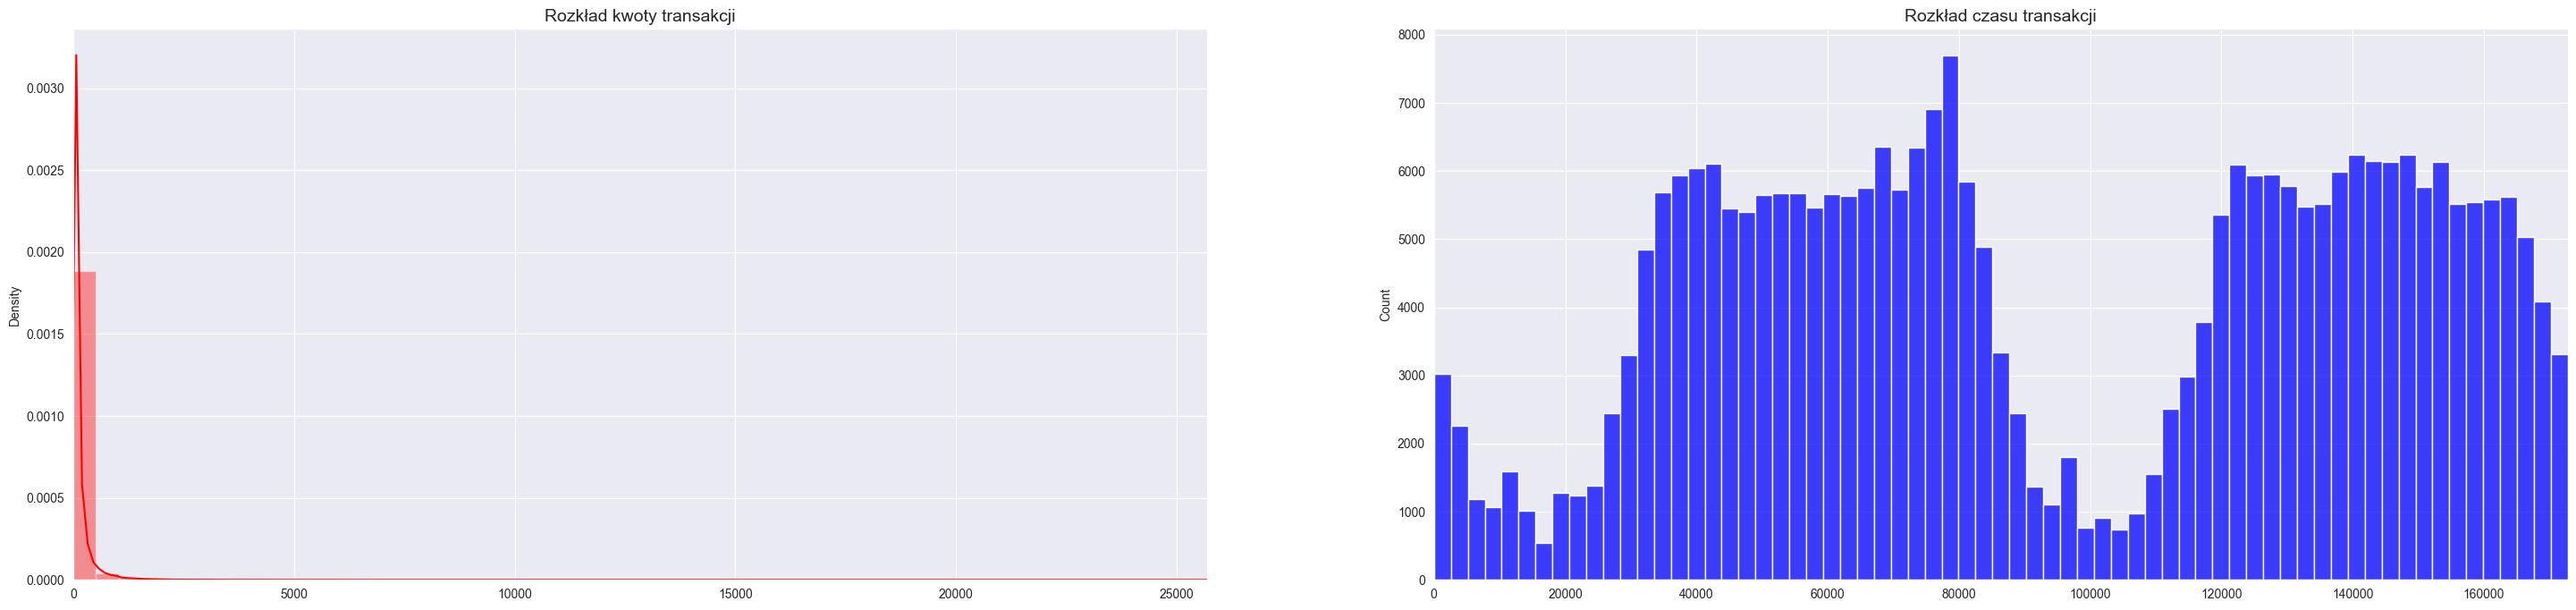

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(36,8))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Rozkład kwoty transakcji', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Rozkład czasu transakcji', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [111]:
# Histogramy i wykresy rozrzutu
# sns.pairplot(data=df, hue='Class')
# plt.show()

## Korelacje

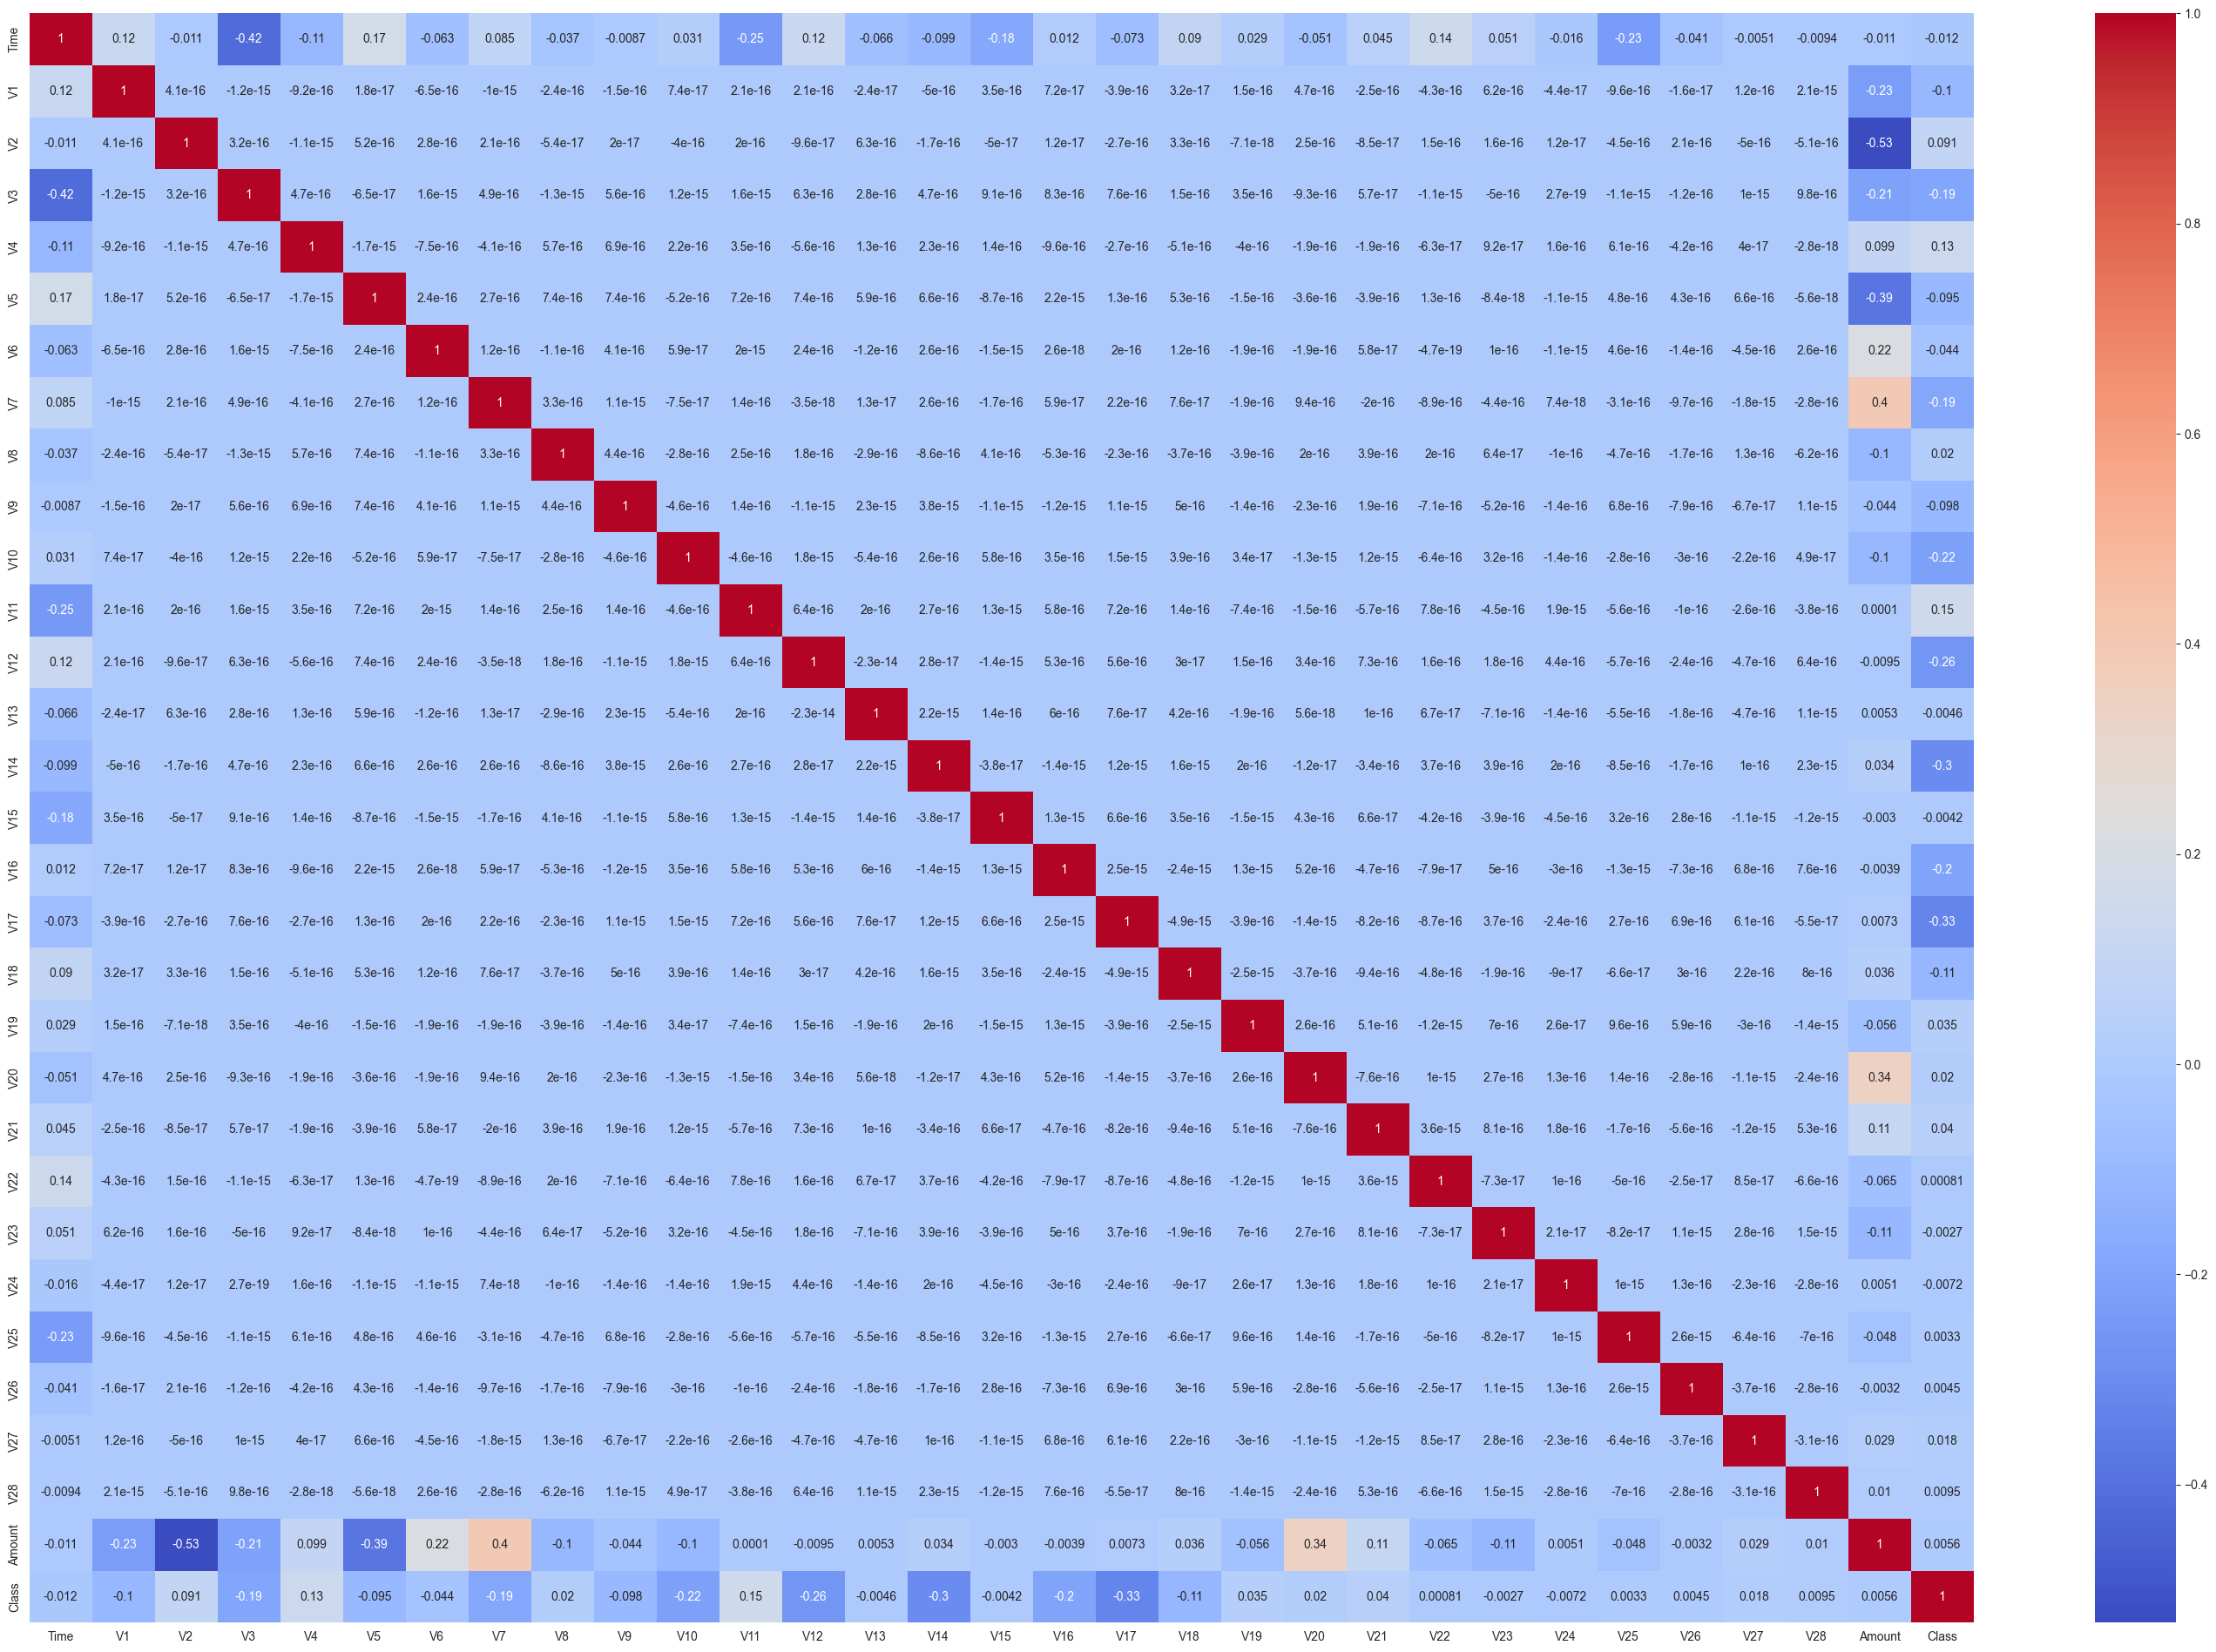

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(36, 24))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.show()

## Wykres pudełkowy dla cech numerycznych w zależności od klasy

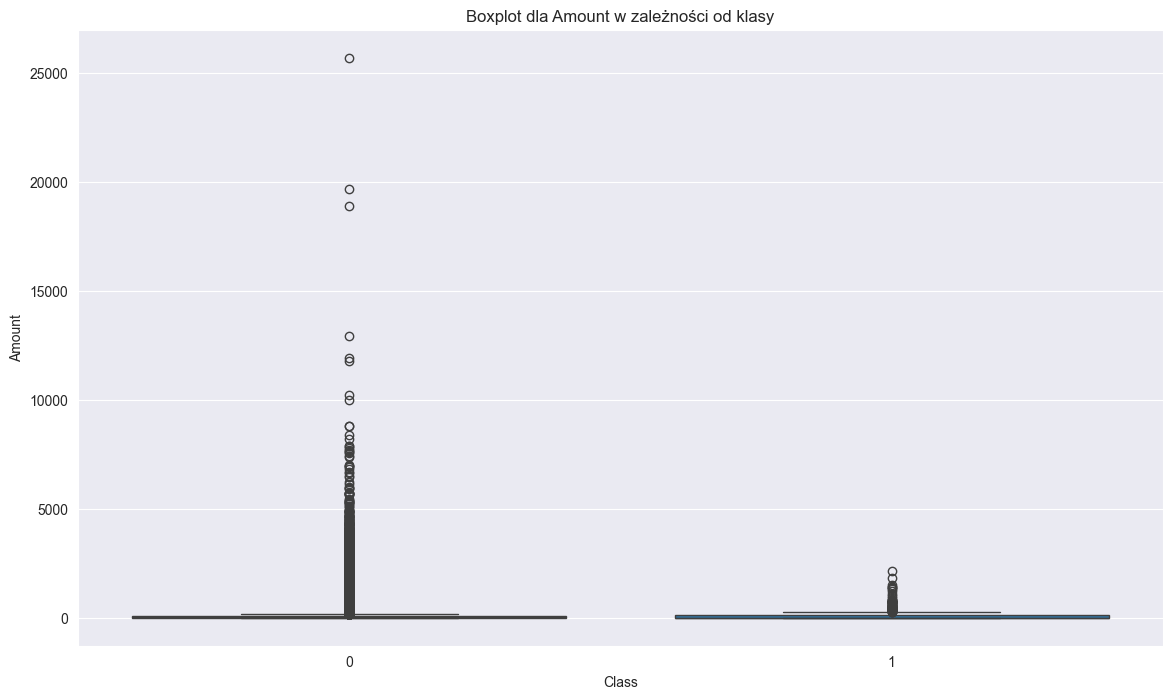

In [15]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot dla Amount w zależności od klasy')
plt.show()

## Histogramy dla cech numerycznych w zależności od klasy


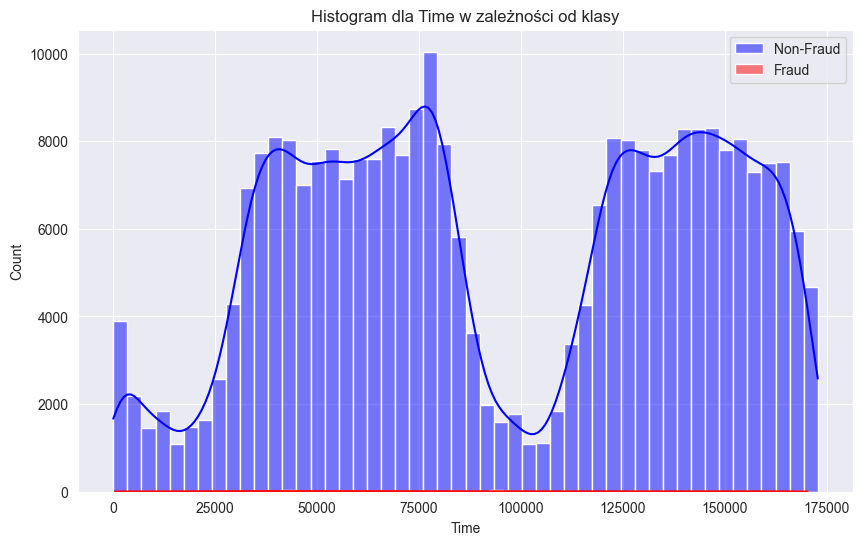

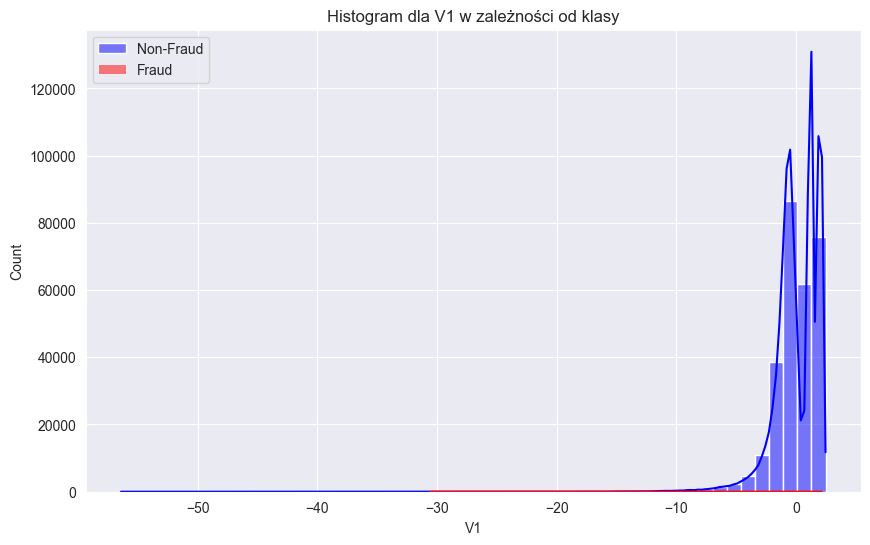

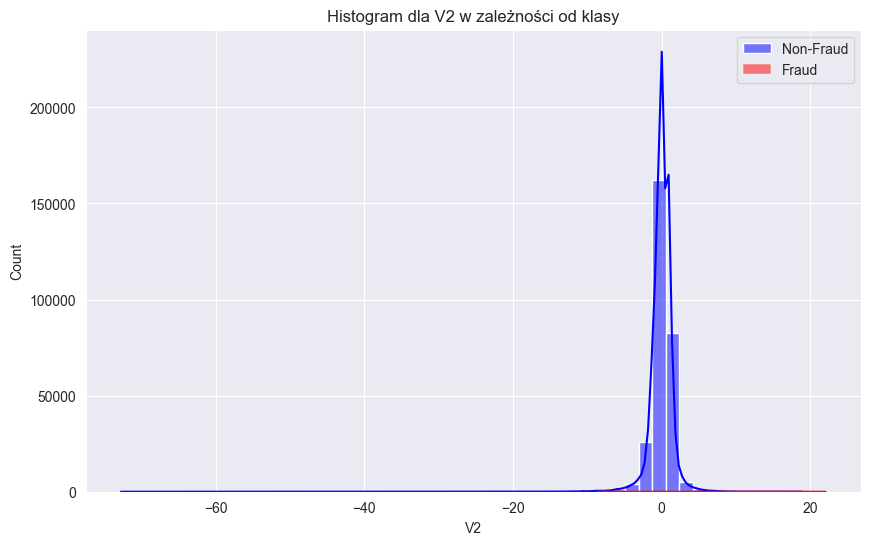

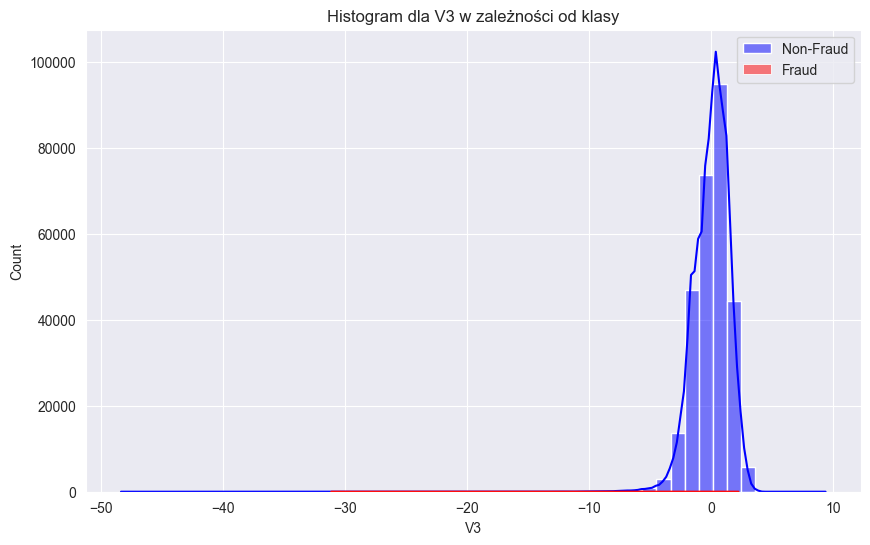

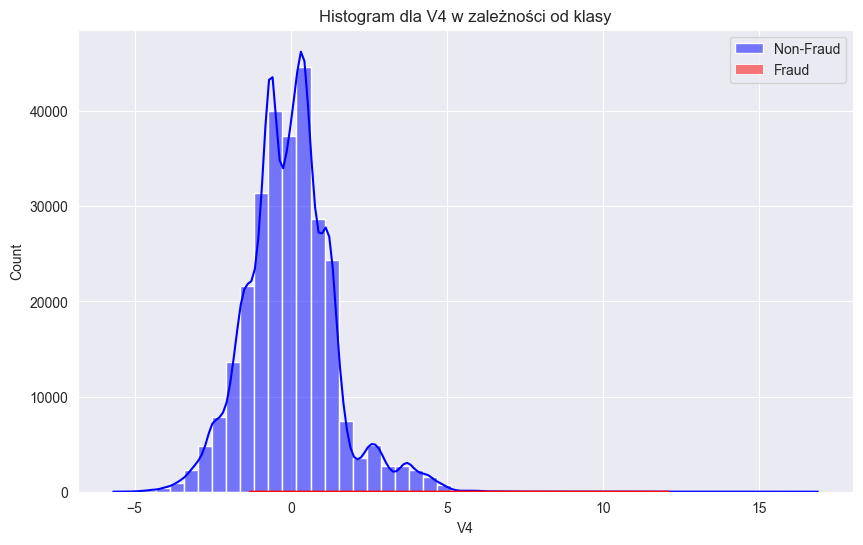

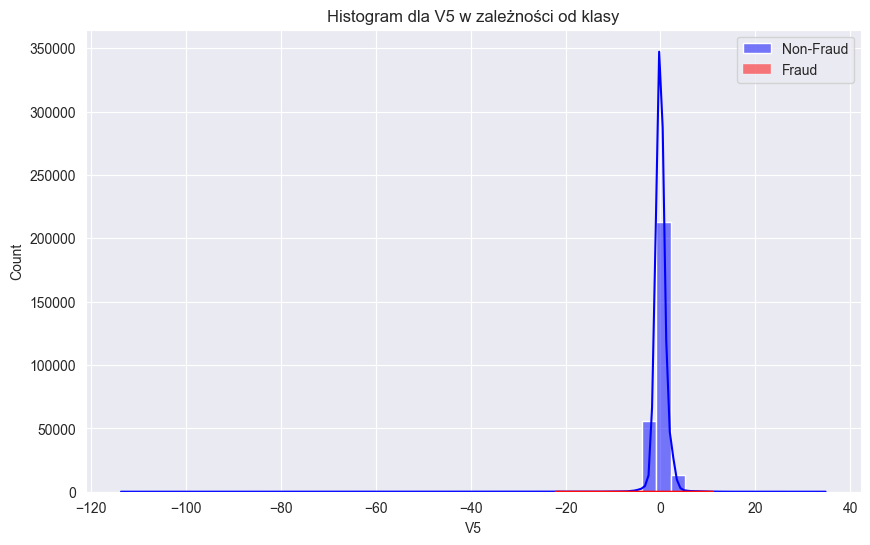

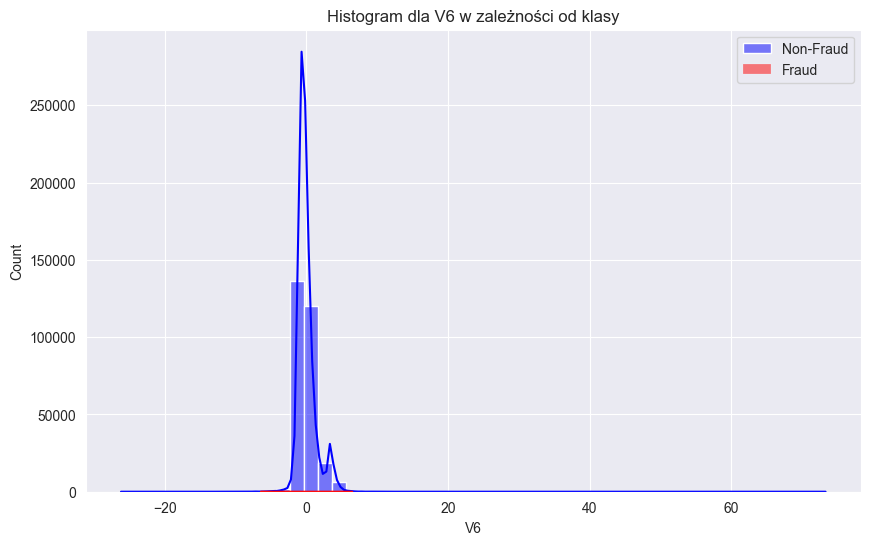

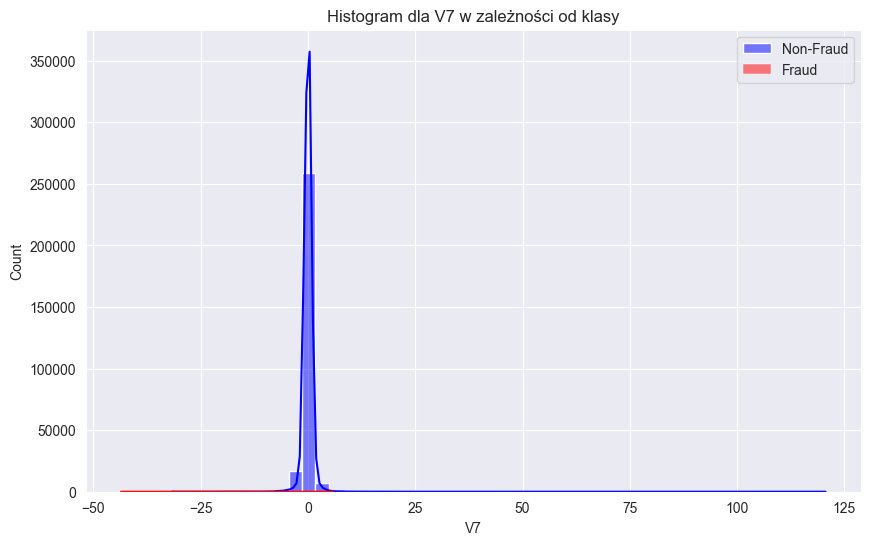

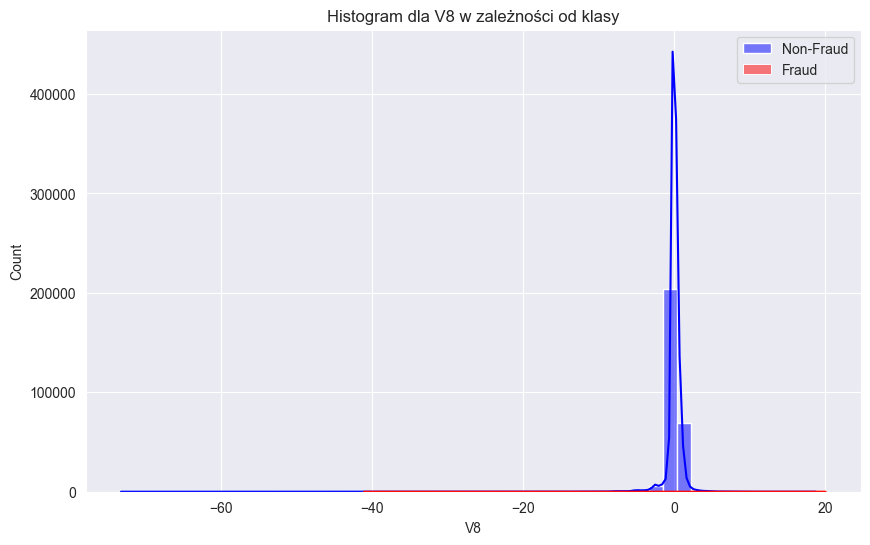

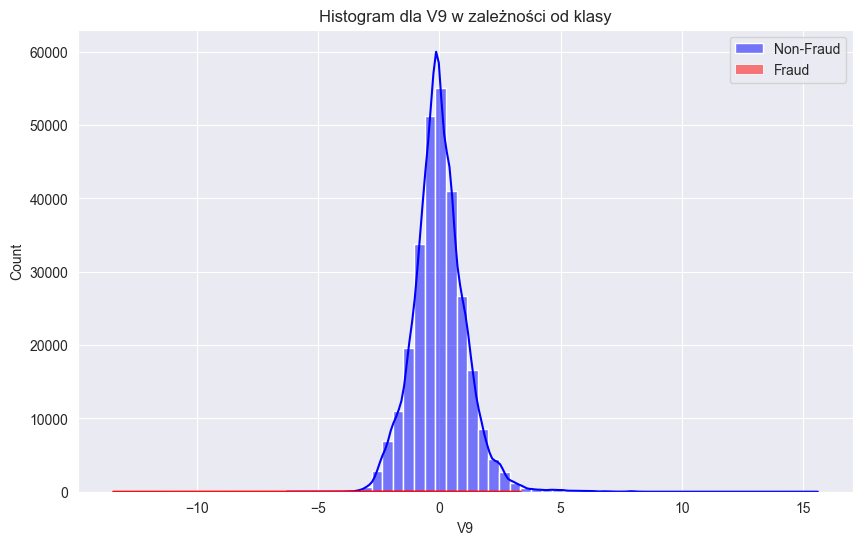

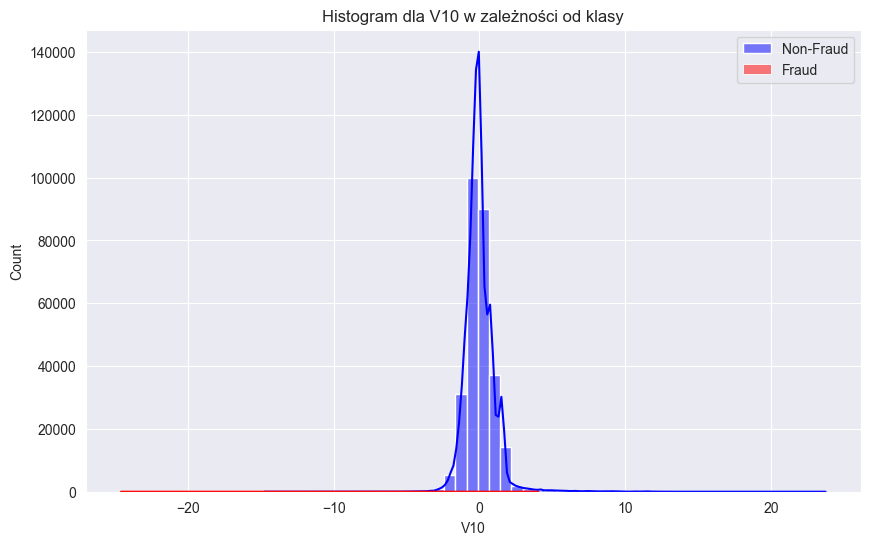

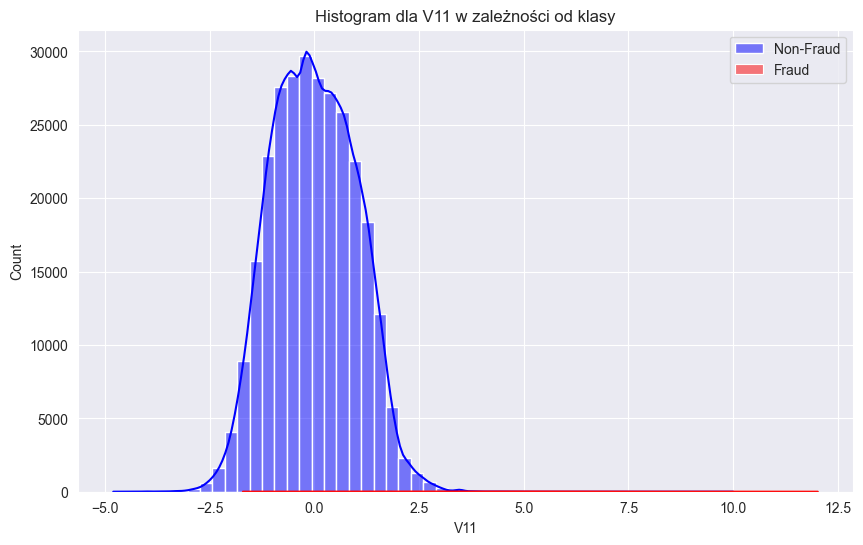

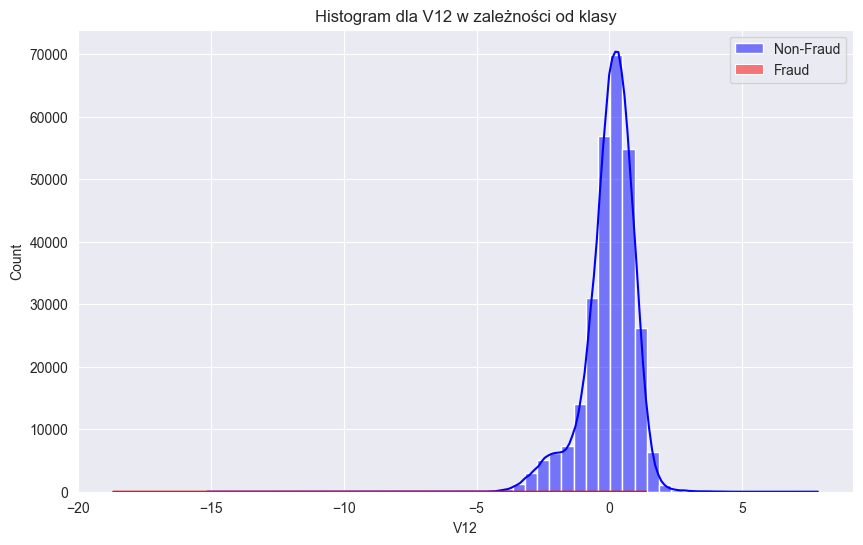

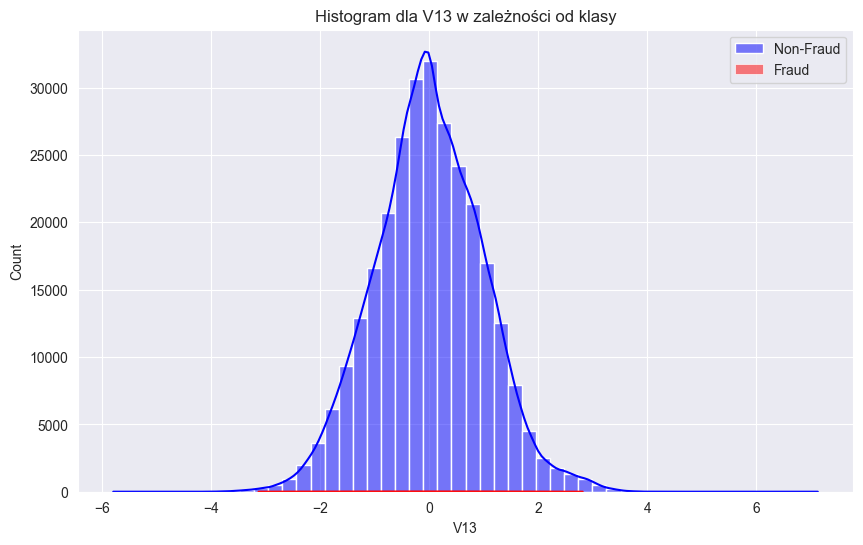

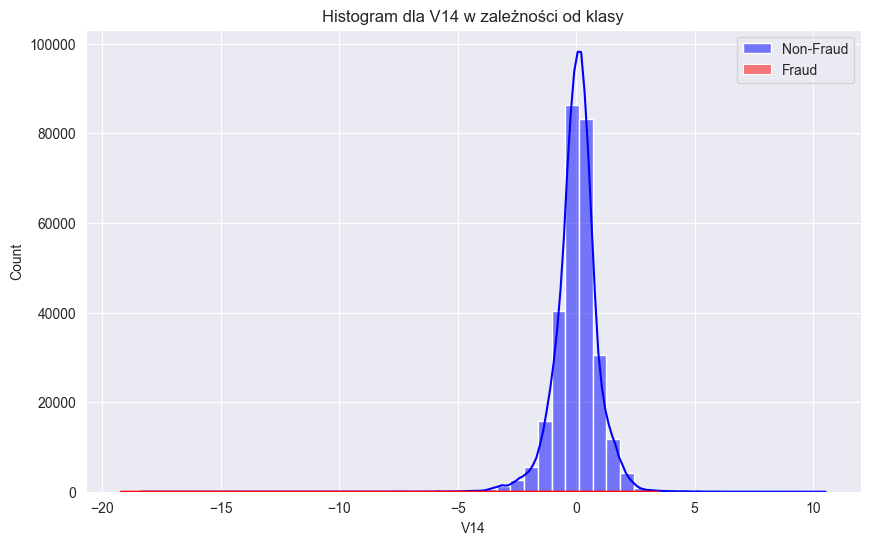

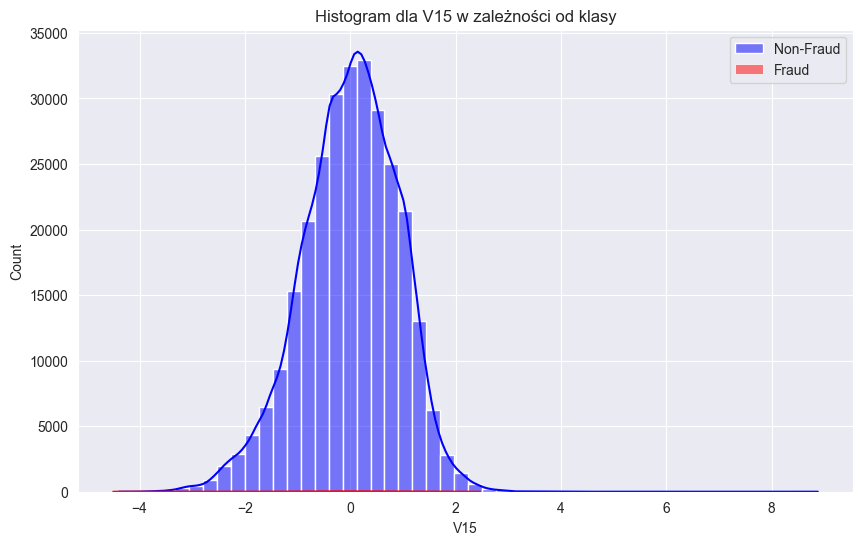

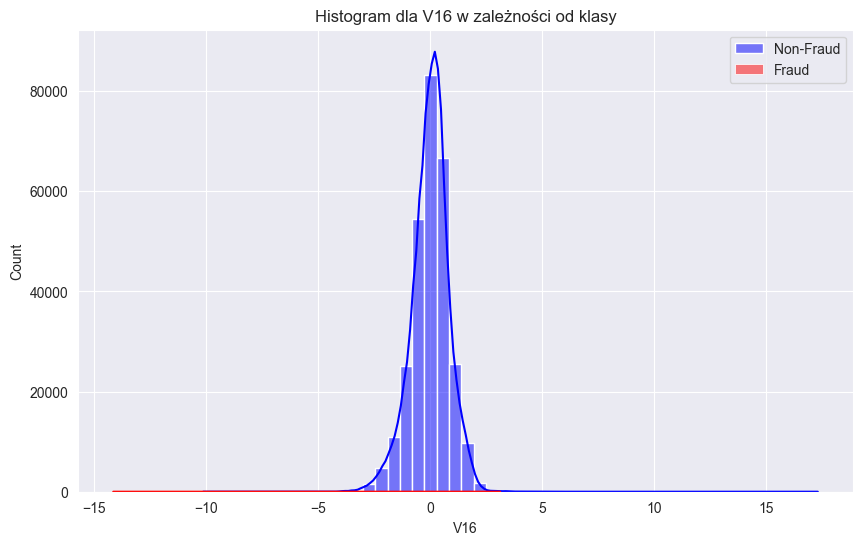

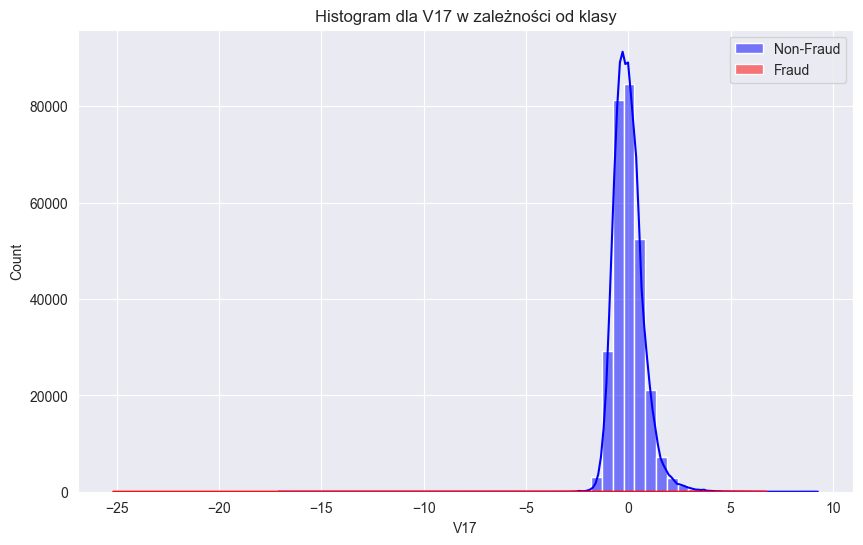

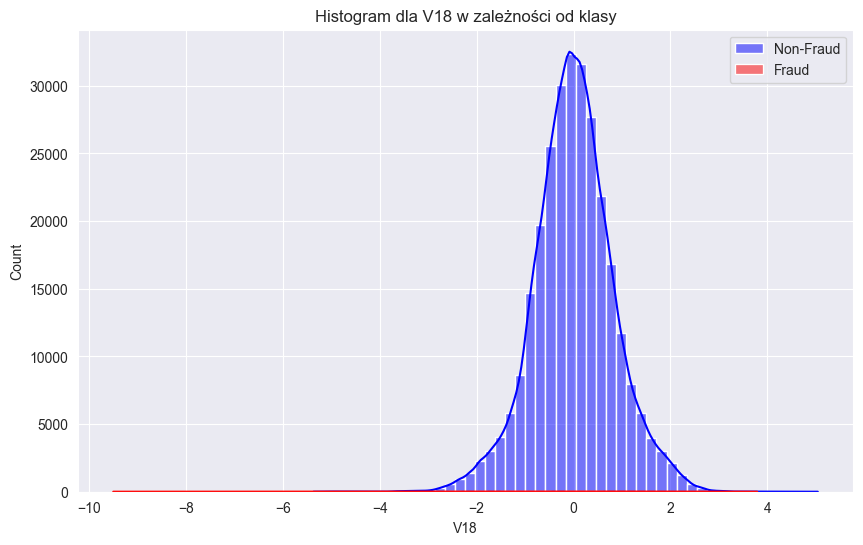

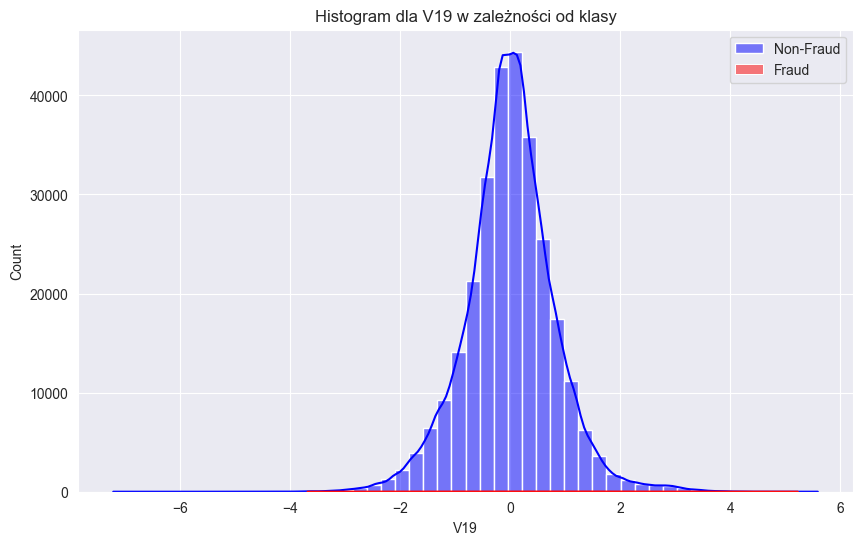

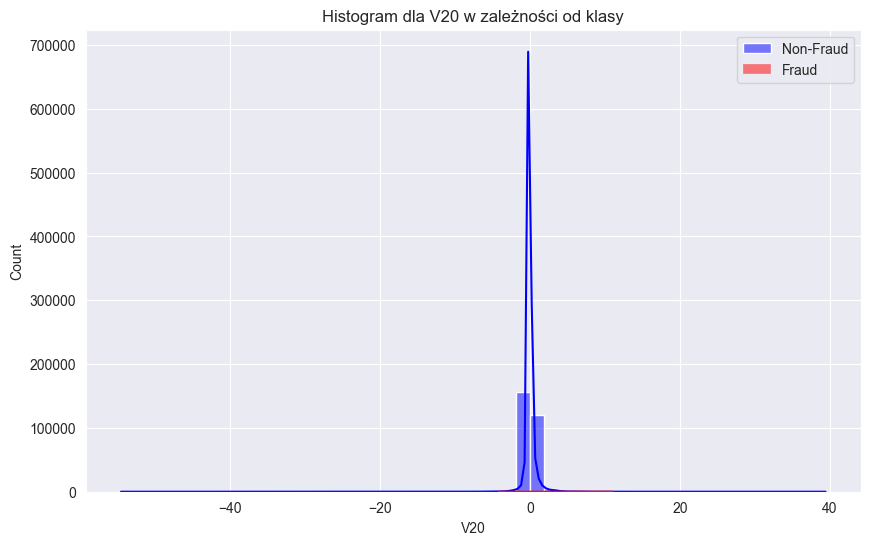

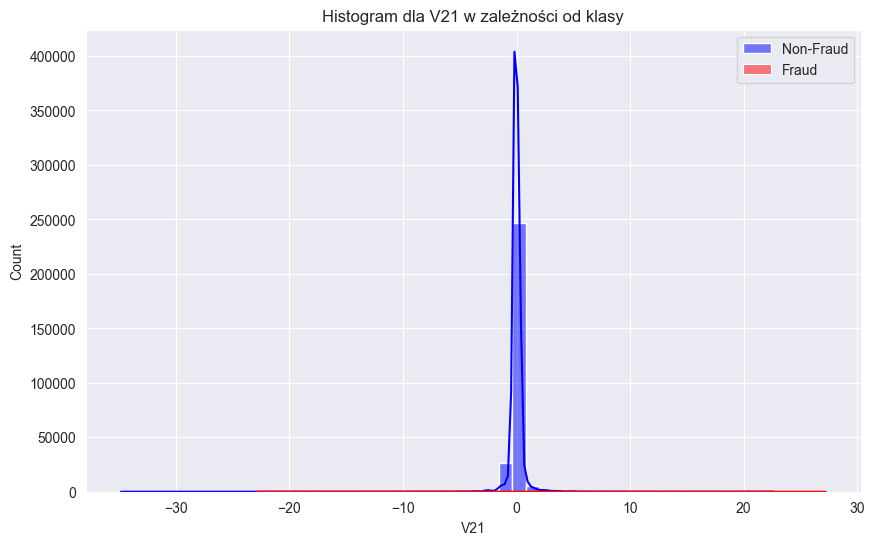

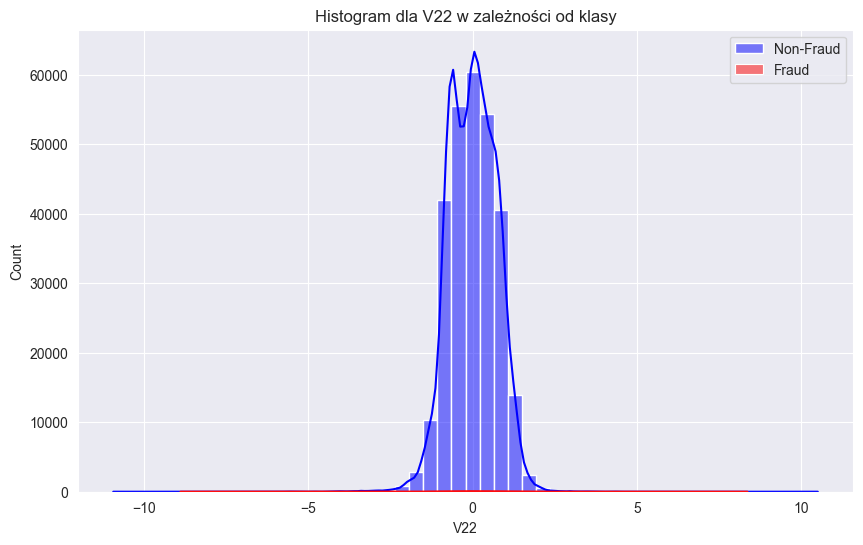

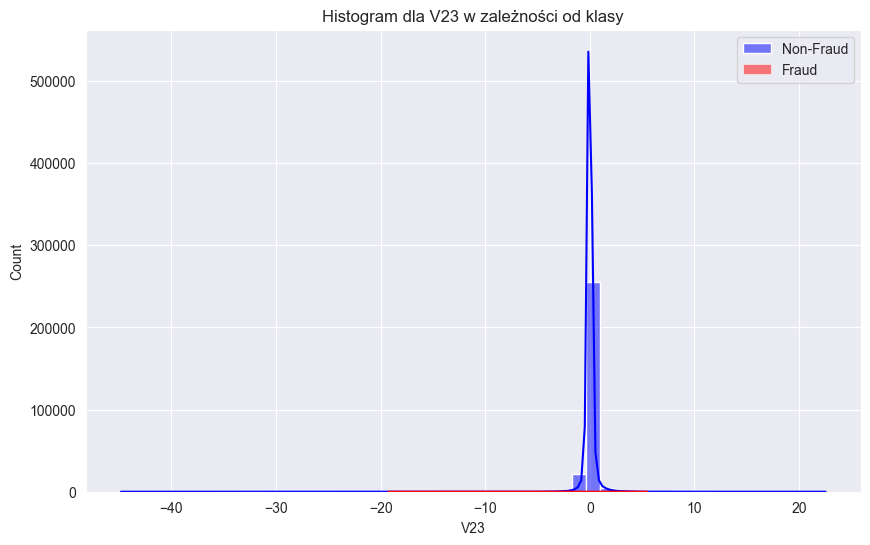

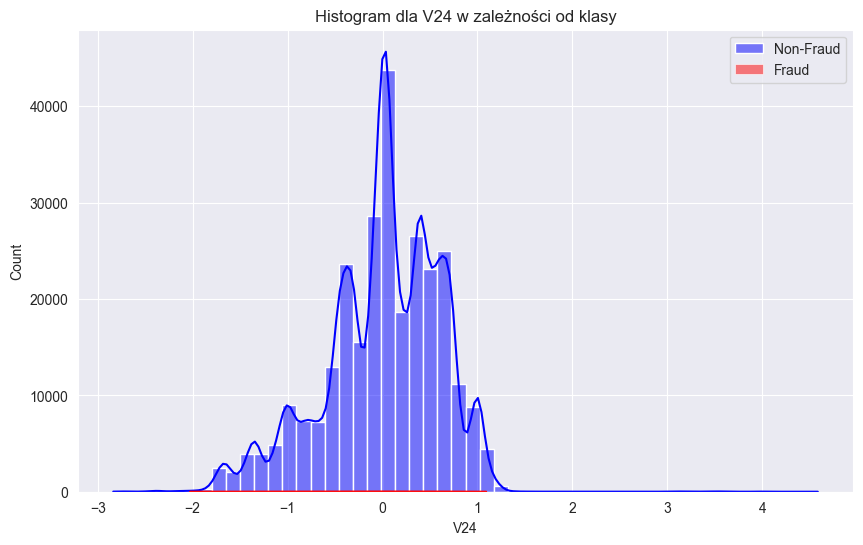

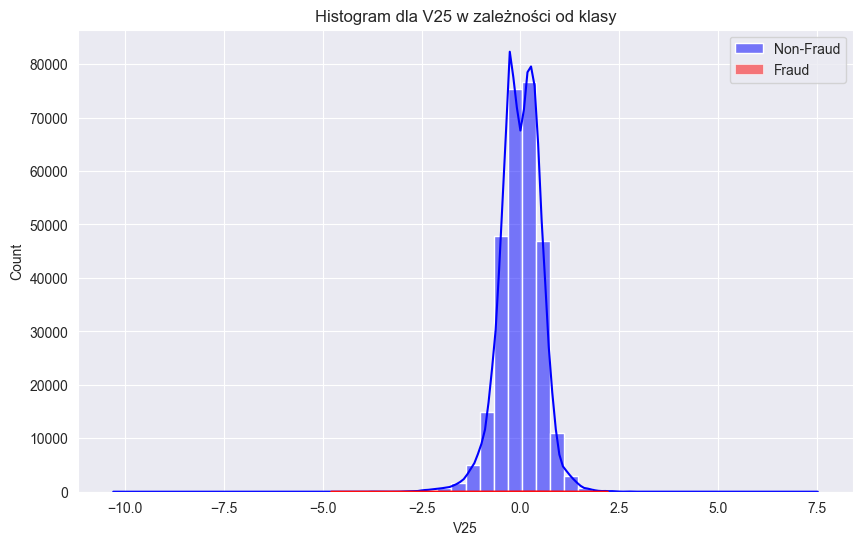

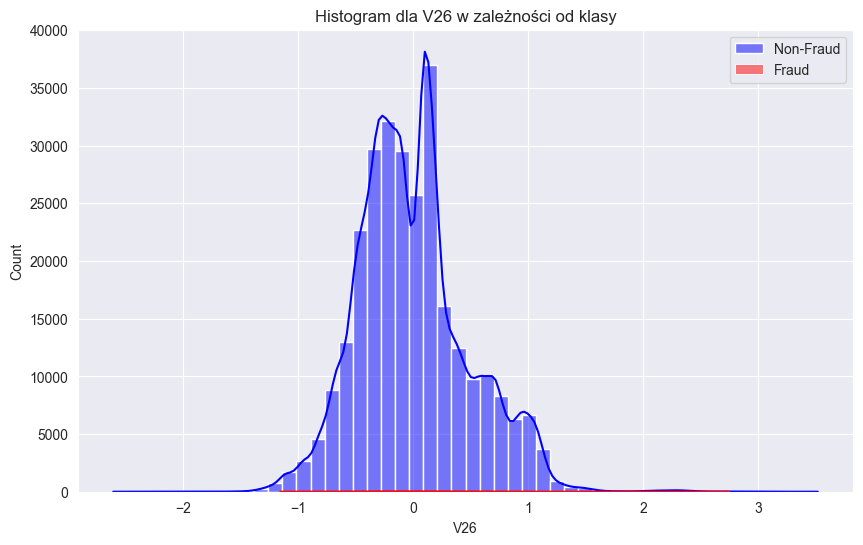

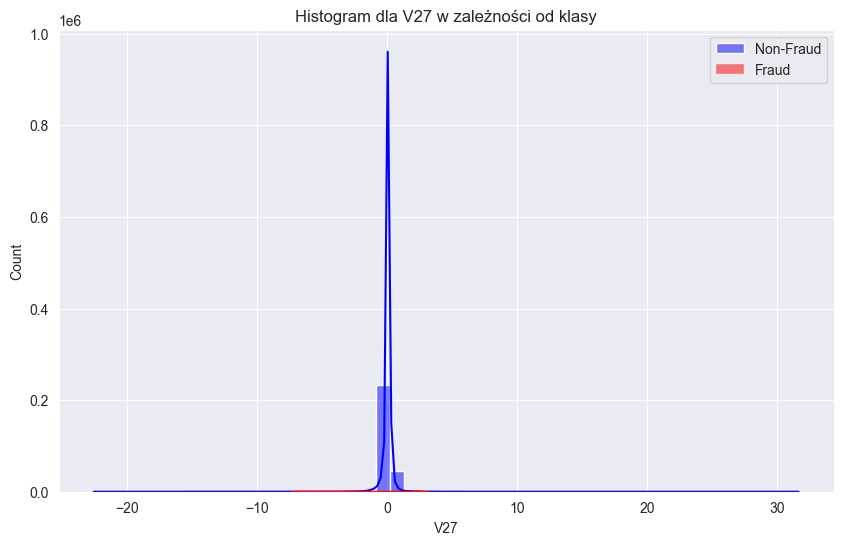

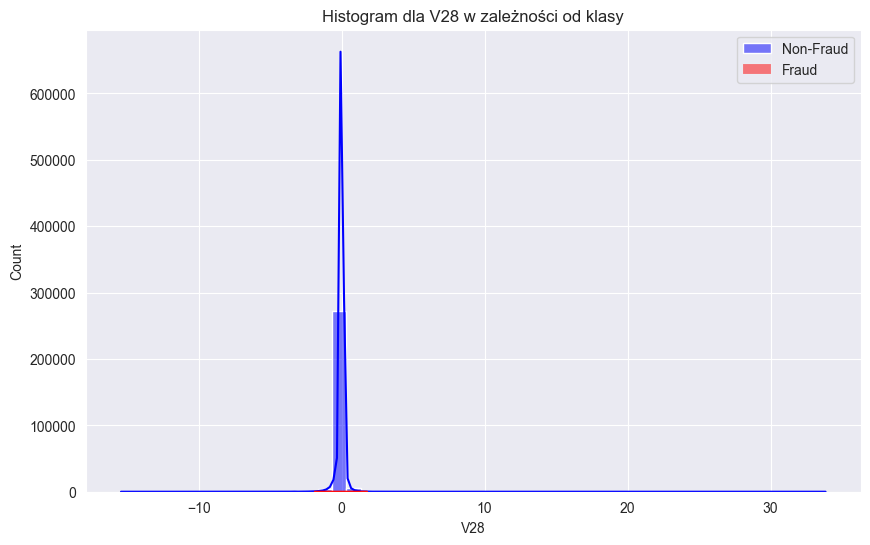

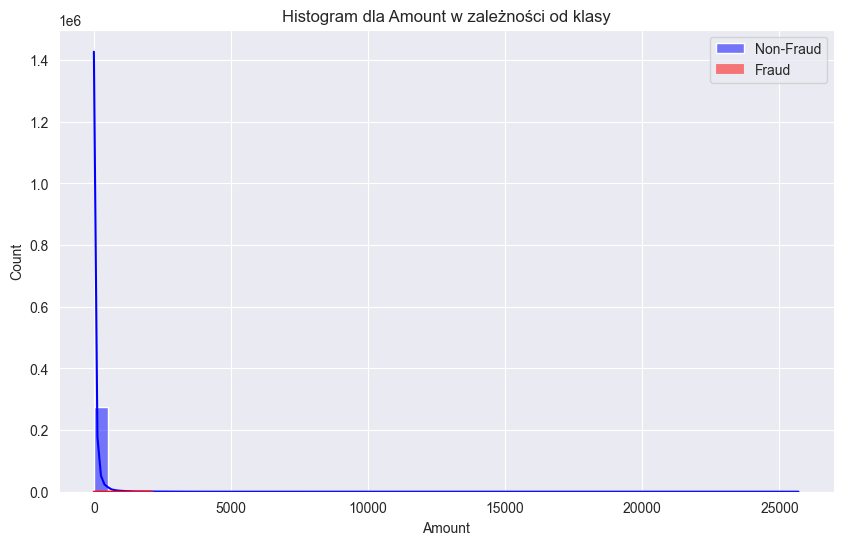

In [16]:
num_features = df.select_dtypes(include=['float64']).columns
for feature in num_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['Class'] == 0][feature], bins=50, label='Non-Fraud', color='blue', kde=True)
    sns.histplot(df[df['Class'] == 1][feature], bins=50, label='Fraud', color='red', kde=True)
    plt.title(f'Histogram dla {feature} w zależności od klasy')
    plt.legend()
    plt.show()


## Wykres gęstości prawdopodobieństwa Kwota (Kernel Density Estimate - KDE)

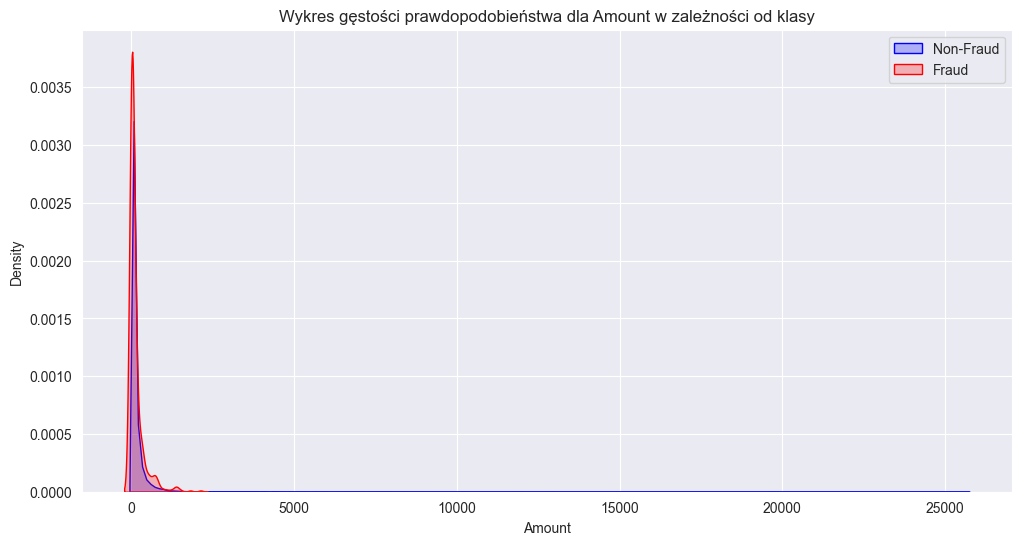

In [18]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', fill=True, color='red')
plt.title('Wykres gęstości prawdopodobieństwa dla Amount w zależności od klasy')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

## Wykres gęstości prawdopodobieństwa Czas (Kernel Density Estimate - KDE)

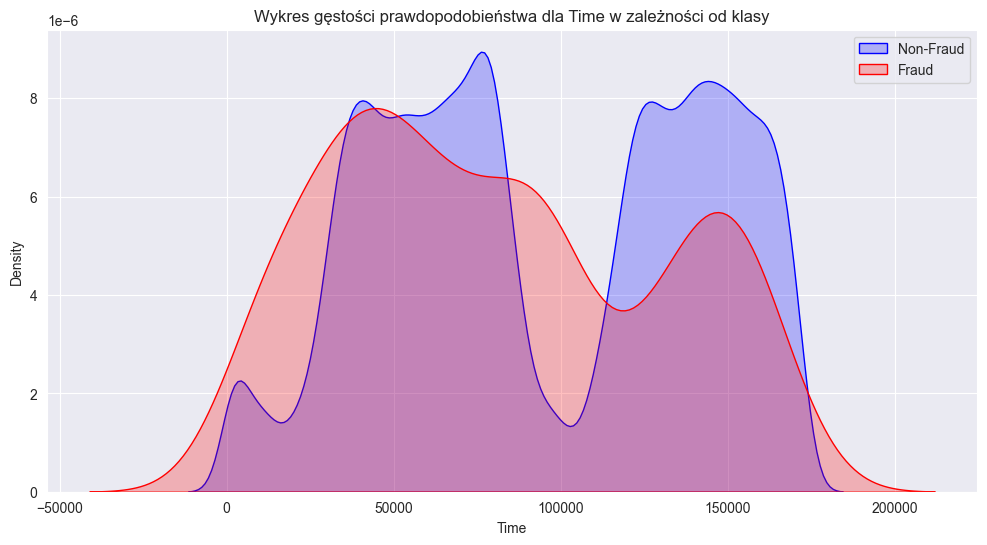

In [20]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', fill=True, color='blue')
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', fill=True, color='red')
plt.title('Wykres gęstości prawdopodobieństwa dla Time w zależności od klasy')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()